# Fitting Regression Tree
Here we fit a regression tree to the Boston data set


In [2]:
library(MASS)
library(tree)
set.seed(1)
train=sample(1:nrow(Boston),nrow(Boston)/2) #sampling 50:50
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Warning message:
"package 'tree' was built under R version 3.4.3"


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

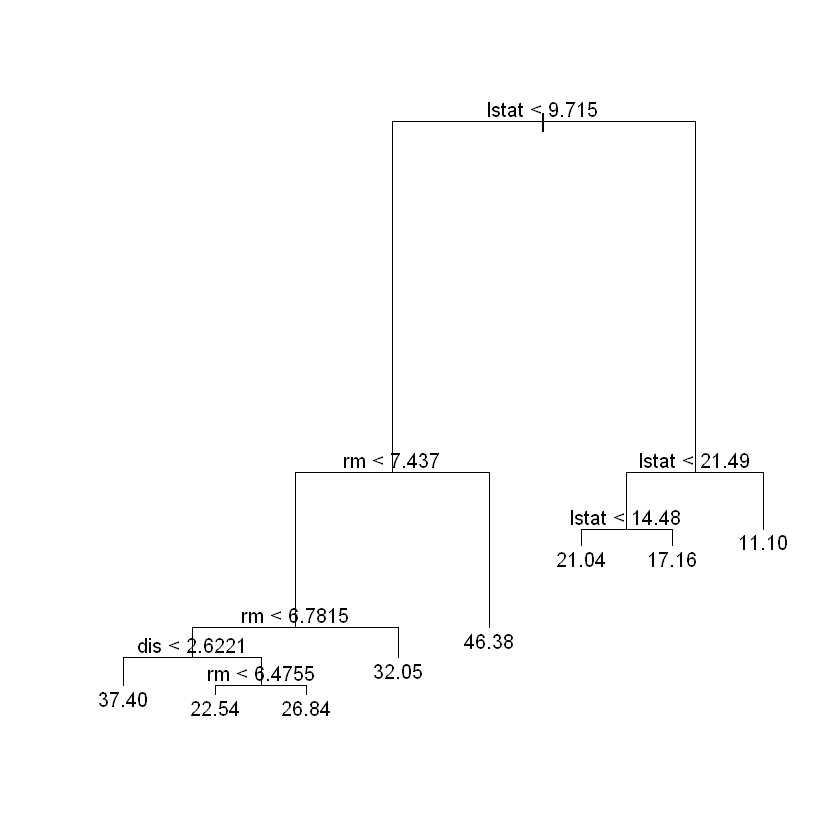

In [3]:

#Plot the tree
plot(tree.boston)
text(tree.boston,pretty=0)


In [4]:


#Pruning the tree using cross validation
cv.boston=cv.tree(tree.boston)
names(cv.boston)



[1] "size"   "dev"    "k"      "method"

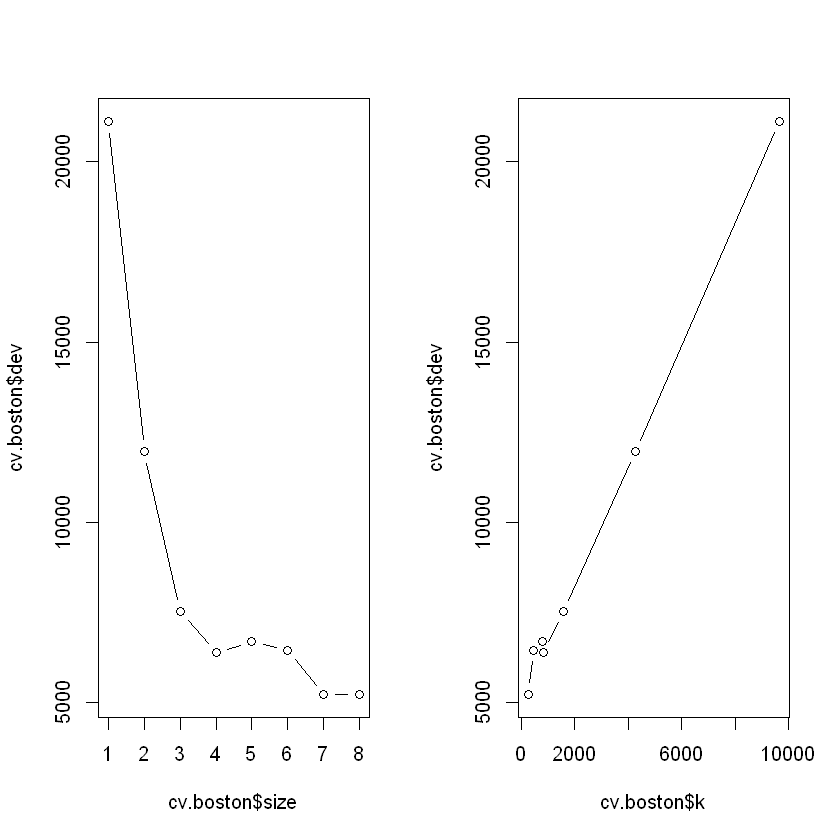

In [5]:

# plot the error rate as a function of both size and k
par(mfrow=c(1,2))
plot(cv.boston$size, cv.boston$dev, type="b")
plot(cv.boston$k, cv.boston$dev, type="b")


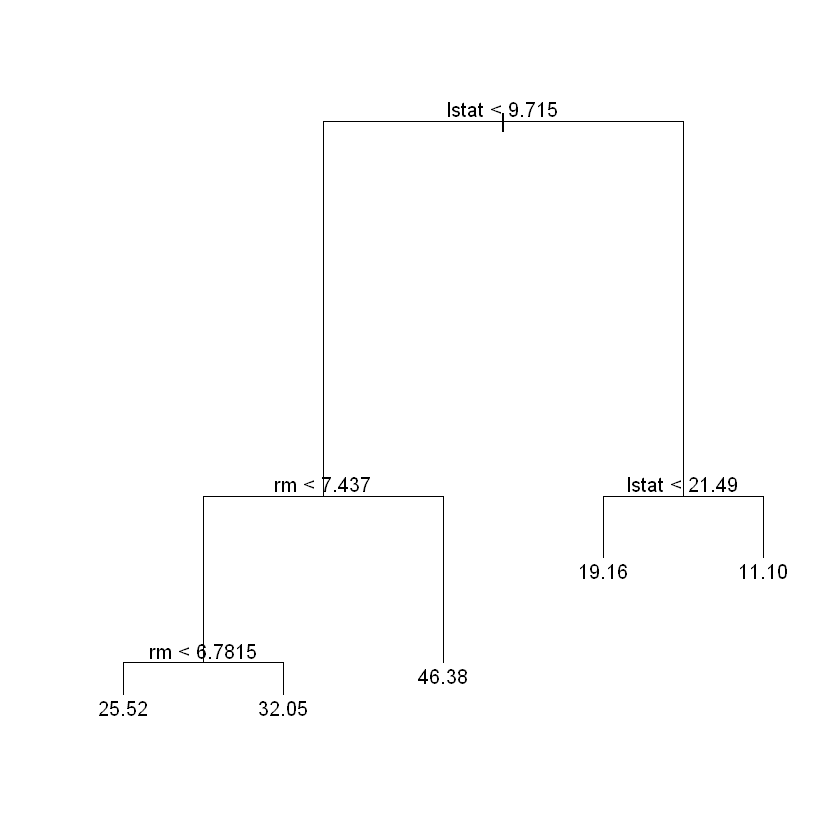

In [6]:

#Prune the tree
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)


[1] 25.04559

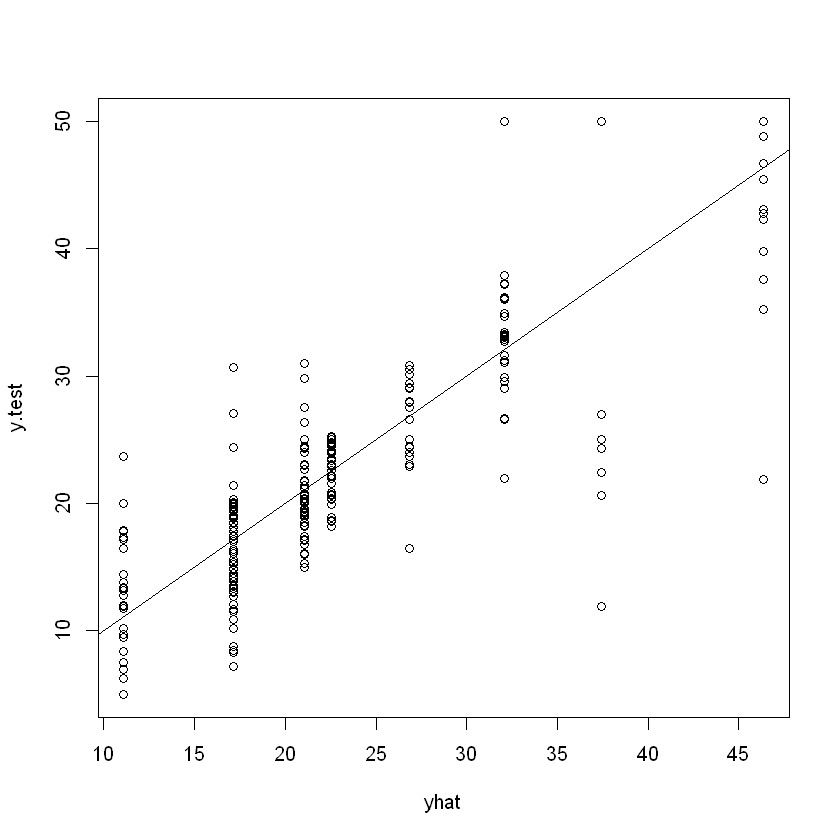

In [7]:

yhat=predict(tree.boston,newdata=Boston[-train,])
y.test=Boston[-train,"medv"]
plot(yhat,y.test)
abline(0,1)
mean((yhat-y.test)^2)
#test set MSE associated with the regression tree is 25.05